<h1>Intro to Computer Music, Lab 3</h1>
<h2>Gus Xia & Ziyu Wang, NYU Shanghai</h2>

In this lab you will:

0. create more sound
1. reproduce some examples used in the lecture
2. hopefully, gain a better understanding of frequency domain representation


Again, here is a jupyter notebook cheat sheet:
https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

<h2> Load packages </h2>



In [157]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from operator import add
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
from __future__ import print_function # use the print() function from Python3

In [158]:
# some new packages for this lab
from scipy import signal
from scipy.interpolate import interp1d

<h2>Recap: A pure sine wave </h2>


In [159]:
# create a sine wave from scratch 
# try to modify some parameters
A = 1;
f = 440;
#f = 440 * 11
phi = 0;
sr = 44100;
#sr = 4410
T = 5;
y = [A * sin(2*pi*f*t + phi) for t in arange(0.,T,1./sr)]
# write it as a function
IPython.display.Audio(data=y, rate=sr) # press the "play" button to hear audio
def cos_wave(A, f, t, sr):
    return [A * cos(2*pi*f*t) for t in arange(0.,t,1./sr)]


<h2> Recap: complex tones</h2>

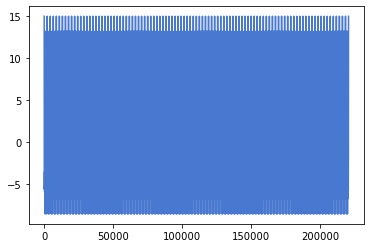

In [160]:
def cos_waves(As, fs, t, sr):
    if type(As) != type(fs):
        print("Error: type of A and f should match\n")
        return
    if type(As) != list and type(fs) != list:
        return cos_wave(As, fs, t, sr)
    if len(As) != len(fs):
        print("Error: length of A and f should match\n")
        return
    index = 0
    wave = cos_wave(As[index], fs[index], t, sr)
    while index < len(As)-1:
        index = index + 1
        wave = np.add(wave, cos_wave(As[index], fs[index], t, sr))
    return wave
# test function  
As = [1,2,4,8]
fs = [440,320,200,100]
y = cos_waves(As, fs, T, sr)
plt.plot(y)
#librosa.display.waveplot(array(y))
plt.show()
IPython.display.Audio(data=y, rate=sr) # press the "play" button to hear audio


<h3> 1. Let's make the figure readable.</h3> 
<h4> The figure above looks bad, why? Here are three ways to plot a wave: </h4>

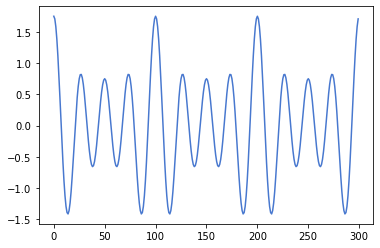

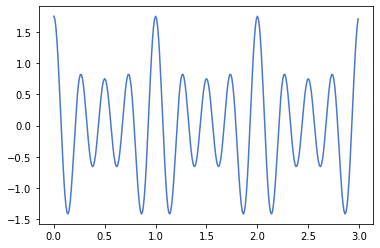

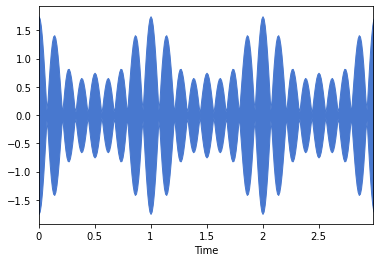

In [161]:
# make the T longer this time
T = 3
# cost less time if we use small sample rate
sr = 100
As = [1,0.5,0.25]
# frequency much lower
fs = [4,3,2]
y = cos_waves(1, 1, T, sr)
# three ways to plot it
y2 = cos_waves(As, fs, T, sr)
plt.plot(y2)
plt.show()
plt.plot(arange(0.,T,1./sr),y2)
plt.show()
librosa.display.waveplot(array(y2),sr = 100)
plt.show()
# cannot hear it!!! why? how about changing the rate
IPython.display.Audio(data=y2, rate=100) # press the "play" button to hear audio


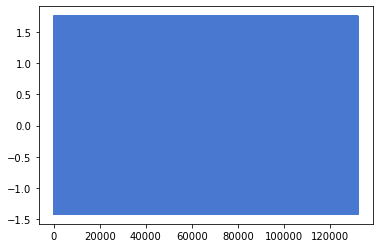

In [162]:
# make the T longer this time
T = 1323
sr = 100
As = [1,0.5,0.25]
# frequency much lower
fs = [4,3,2]
y = cos_waves(1, 1, T, sr)
# three ways to plot it
y2 = cos_waves(As, fs, T, sr)
plt.plot(y2)
plt.show()
# cannot hear it!!! why? how about changing the rate
IPython.display.Audio(data=y2, rate=44100) # press the "play" button to hear audio


<h3>Question 1: If we change sr to 44100, the actual during would become very short. How would you change T so that the actual duration remains to be 3 seconds?</h3>

<h3>Change T from 3 to three times of 44100/100, which is 1323 and the actual during will remain 3 seconds. But in this case, the figure would be unreadable. <h3>

<h3> 2. From frequency-domain representation to time-domain representation</h3>
<h4> Let's start from frequency domain by creating some simple spectra</h4>

<ipython-input-163-ce05d122f0fa>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fs,As)


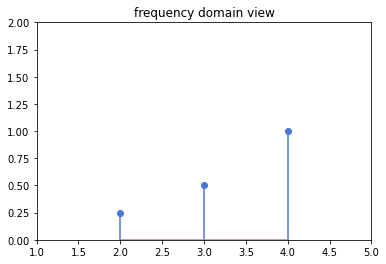

In [163]:
# frequency domain function
# Assuming everything is continoues, and the signal is infinite long
def create_spect(fs, As):
    if type(As) != type(fs):
        print("Error: type of A and f should match\n")
        return
    if type(As) != list and type(fs) != list:
        As = [As]
        fs = [fs]
    if len(As) != len(fs):
        print("Error: length of A and f should match\n")
        return
    # stem plot
    plt.stem(fs,As)
    # set the axes view
    axes = plt.gca()
    axes.set_xlim([min(fs)-1,max(fs)+1])
    axes.set_ylim([0,max(As)+1])
    plt.title('frequency domain view')
    plt.show()
    

# test function
#create_spect(1,1)
#create_spect([0,1],[0,3,4,2,0])
#create_spect([0,1,2,4,5],[0,3,4,2,0])
create_spect(fs, As)


<h4> Now let's plot the spectrum of a harmonic series. (It looks like an impulse train, right?) </h4>

<ipython-input-163-ce05d122f0fa>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fs,As)


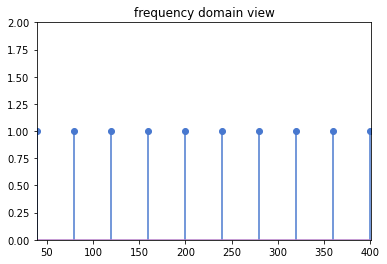

In [164]:
# this function is our old friend, remember?
def over_tone_freqs(f0,N_partials):
    return [f0*i for i in range(1,N_partials+1)]

f0 = 40
N = 10
As = np.ones((1,N))[0].tolist()
fs = over_tone_freqs(f0, N)
create_spect(fs, As)

<h4>Use additive synthesis to turn the spectrum to a wave</h4>

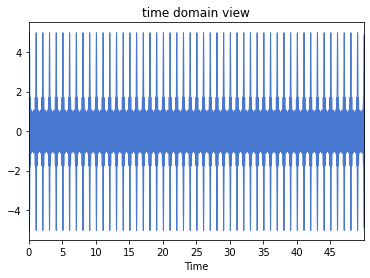

<ipython-input-163-ce05d122f0fa>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fs,As)


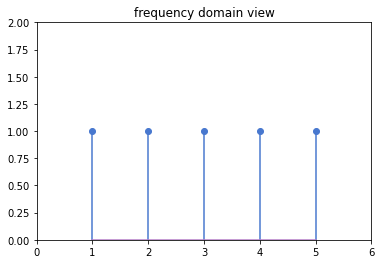

In [165]:
# Now let's create an impalse train by adding waves of different freq.
# to make the plot look nicer, let use low frequency
f0 = 1
N = 5 # 
As = np.ones((1,N))[0].tolist() 
# fs = arange(0,L,1).tolist() # another way to create harmonic series
fs = over_tone_freqs(f0, N)
#print(fs)
sr = 100
T = 50
y3 = cos_waves(As, fs, T, sr)
# Time domain view
librosa.display.waveplot(array(y3), sr)
#plt.plot(arange(0.,T*10,1./sr),y3)
plt.title('time domain view')
plt.show()
# spectral domain view
create_spect(fs, As)
IPython.display.Audio(data=y3, rate=sr) # press the "play" button to hear audio

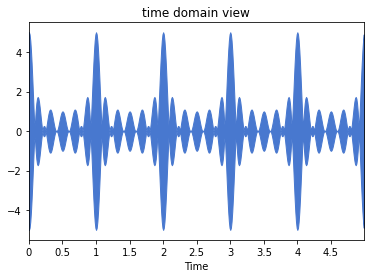

<ipython-input-163-ce05d122f0fa>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fs,As)


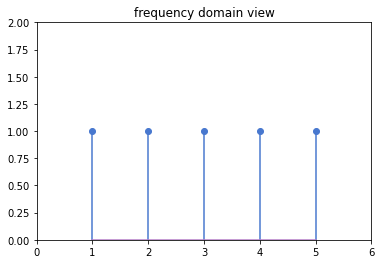

In [166]:
# Now let's create an impalse train by adding waves of different freq.
# to make the plot look nicer, let use low frequency
f0 = 1
N = 5 # 
As = np.ones((1,N))[0].tolist() 
# fs = arange(0,L,1).tolist() # another way to create harmonic series
fs = over_tone_freqs(f0, N)
#print(fs)
sr = 100
T = 5
y3 = cos_waves(As, fs, T, sr)
# Time domain view
librosa.display.waveplot(array(y3), sr)
#plt.plot(arange(0.,T*10,1./sr),y3)
plt.title('time domain view')
plt.show()
# spectral domain view
create_spect(fs, As)

<h4>Do you see the time domain signal looks like a pulse train? If not so obvious, try a larger N! </h4>

<h3> OK, we create such a "simple" signal (impulse train) in such a "complicated" (additive synthesis) way. </h3>
<h3> Question 2: What do you learn from this example? </h3>

<h3>In time domain a pure impulse train will be the sum of infinite sine waves with the same fundation frequency. The impluse train in frequency domain remains an impluse train in time domain,  <h3>

<h3>3. From time domain to frequency domain: Fourier Transform</h3>

In [167]:
fourier_transform = np.fft.rfft(y3)
frequency = np.linspace(0, sr/2, len(fourier_transform))

<h4>Let's inspect this variable</h4>

[-3.55271368e-15+0.00000000e+00j -1.39554257e-13+6.91687310e-14j
  3.66369165e-14+1.51763743e-14j -1.21835890e-13+1.43275656e-14j
 -9.64648018e-14+4.23776916e-14j  2.50000000e+02-7.38899784e-14j
 -9.24296706e-14-6.09265459e-14j  1.98653789e-14-5.68231045e-14j
 -1.31636894e-13-1.78975814e-13j -2.83930363e-14+1.56720928e-16j
  2.50000000e+02-1.52972513e-13j  1.24449548e-14+2.81858938e-14j
  6.53531852e-14-1.11012497e-13j -1.62873101e-13+1.53476968e-14j
 -3.48321849e-14+9.98725812e-15j  2.50000000e+02-2.90537614e-13j
  1.30851715e-13+9.27384628e-15j  1.14294713e-13-4.75232129e-14j
 -8.95774576e-14-1.04876191e-14j  1.68141261e-14+9.16599751e-14j
  2.50000000e+02-2.42667971e-13j  2.57694817e-14+8.47716479e-15j
  1.27576119e-13-7.35621655e-14j -2.07340906e-14+2.15661126e-14j
  1.87339534e-14+9.68881265e-14j  2.50000000e+02-2.80125157e-13j
  5.63957699e-14+1.28628382e-13j  3.95924911e-14-3.39777556e-14j
 -1.97323242e-13-2.74996625e-14j  1.40285302e-13-1.72890148e-13j
  1.15165905e-13-3.121645

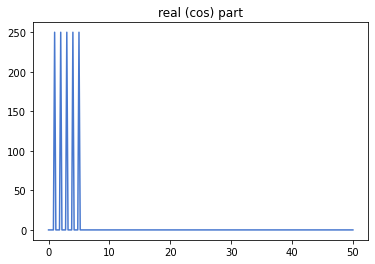

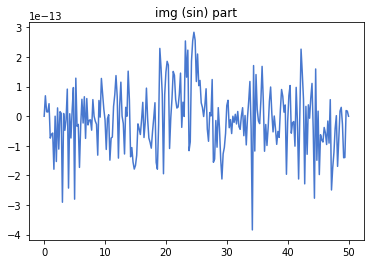

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4
 19.6 19.8 20.  20.2 20.4 20.6 20.8 21.  21.2 21.4 21.6 21.8 22.  22.2
 22.4 22.6 22.8 23.  23.2 23.4 23.6 23.8 24.  24.2 24.4 24.6 24.8 25.
 25.2 25.4 25.6 25.8 26.  26.2 26.4 26.6 26.8 27.  27.2 27.4 27.6 27.8
 28.  28.2 28.4 28.6 28.8 29.  29.2 29.4 29.6 29.8 30.  30.2 30.4 30.6
 30.8 31.  31.2 31.4 31.6 31.8 32.  32.2 32.4 32.6 32.8 33.  33.2 33.4
 33.6 33.8 34.  34.2 34.4 34.6 34.8 35.  35.2 35.4 35.6 35.8 36.  36.2
 36.4 36.6 36.8 37.  37.2 37.4 37.6 37.8 38.  38.2 38.4 38.6 38.8 39.
 39.2 39.

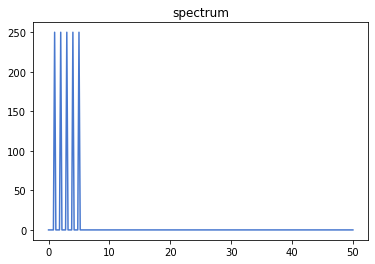

In [168]:
print(fourier_transform)
#the real part of the cos wave
plt.plot(frequency,np.real(fourier_transform))
plt.title('real (cos) part')
plt.show()
# the img part
plt.plot(frequency, np.imag(fourier_transform))
plt.title('img (sin) part')
plt.show()

# compute the absolute value
abs_fourier_transform = np.abs(fourier_transform)
print (np.linspace(0, sr/2, len(abs_fourier_transform)))
#frequency = np.linspace(0, sr/2, len(abs_fourier_transform))
#power_spectrum = np.square(abs_fourier_transform)
plt.plot(frequency, abs_fourier_transform)
plt.title('spectrum')
plt.show()


<h3>Question 3: why "np.linspace(0, sr/2, len(abs_fourier_transform))" can return the correct frequency components? Please briefly explain</h3>

According to Nyquist-Shannon Sampling Theorem, if the sampling frequency is larger than twice the highest frequency in the signal, we can get a perfect reconstruction. So the end is sr/2, which means the maximun of the frequency should be half of the sample rate. Once half the period of the wave is larger than the sample rate, it can be recorded perfectly. 

`abs_fourier_transform` here means the exact value of the frequency which is divided into real part and image part in the previous part. And the value, or what `abs_fourier_transform` represents, is the amplitude. 

<h3>Besides additive synthesis, we have another way to recover the signal<h3>

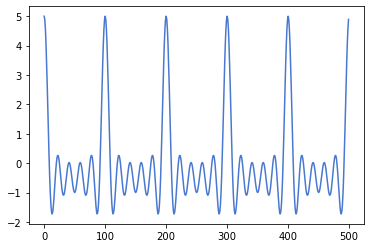

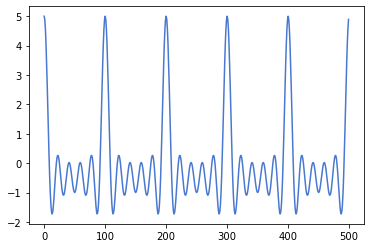

In [169]:
x = np.fft.irfft(fourier_transform)
plt.plot(x)
plt.show()

plt.plot(y3)
plt.show()

<h3> 4. Convolution in one domain is multiplication in another domain</h3>


<h3>Question 4: Implement a convolution function from scratch.</h3>

*Hint: assume the two inputs are called signal and kernel. Keep signal in the original place and shift kernel, aggregate the result.*

In [170]:
def convolve(signal, kernel, equal_size=True):
    # signal and kernal both numpy.ndarray
    N = len(signal)
    M = len(kernel)
    result = np.zeros((M + N - 1))
    for i in range(N):
        result[i:i+M] += signal[i]*kernel
       # for j in range (M):
        #    result[i+j] += signal[i]*kernel[j]
            
        pass
    if equal_size:
        result = result[int((M - 1) / 2): int((M - 1) / 2) + N]
    return result

The script below is a script to test your function accuracy

In [171]:
# randomize signal x and y
x = np.random.rand(6)
y = np.random.rand(4)
print('x', x)
print('y', y)
z_correct = signal.convolve(x, y, mode='same')
z_my_method = convolve(x, y, equal_size=True)
print('correct:', z_correct)
print('mine:   ', z_my_method)

x [0.68445293 0.6109664  0.49590407 0.49595265 0.82798774 0.44769523]
y [0.14172387 0.73035544 0.43901987 0.21720137]
correct: [0.58648244 0.81699252 0.84936507 0.82998182 0.99361856 0.79820131]
mine:    [0.58648244 0.81699252 0.84936507 0.82998182 0.99361856 0.79820131]


<h4> Now create a cosine wave. We destroy the signal by downsampling. We want to reconstruct its quality by doing convolution with sinc function.</h4>

In [172]:
# first, define a cosine wave
A = 1
f = 440
sr = 44100
T = 1
y = np.array(cos_wave(A, f, T, sr))

# downsampling
alpha = 40  # downsampling rate

ssrr = int(sr / alpha) + 1  # a virtual low sample rate
y = np.pad(y, (0, ssrr * alpha - len(y)), 'constant', constant_values=(0, 0))
print('The virtual sample rate is %d' % ssrr)
IPython.display.Audio(data=y, rate=sr)

The virtual sample rate is 1103


In [173]:
def get_downsampled_x(y, ssrr, alpha):
    y_table = y.reshape((-1, alpha))
    x_data = y_table[:, 0]
    x_stem = np.copy(y_table)
    x_stem[:, 1:] = 0
    x_stem = x_stem.reshape(-1)
    x_step = np.copy(y_table)
    x_step[:, 1:] = y_table[:, 0].reshape((-1, 1))
    x_step = x_step.reshape(-1)
    
    f_linear = interp1d(np.arange(0, len(y) + 1, alpha), np.append(x_data, 0))
    x_linear = f_linear(np.arange(0, len(y)))

    return x_data, x_stem, x_step, x_linear

def plot_wave_start(wave, end=200, stem=False, finish_plot=True, ax=None, legend=None, title=None):
    if end is None:
        end = len(wave)
    if ax is None:
        ax = plt.subplot()
    if stem:
        ax.stem(wave[0: end], label=legend)
    else:
        ax.plot(wave[0: end], '-', label=legend)
    plt.title(title)
    if finish_plot:
        plt.show()
        return None
    else:
        return ax

def plot_wave_starts(waves, end, stems, legends):
    ax = None
    for i, (wave, stem, legend) in enumerate(zip(waves, stems, legends)):
        ax = plot_wave_start(wave, end, stem, False, ax, legend)
    ax.legend()
    plt.plot()

<ipython-input-173-05cbc6598492>:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(wave[0: end], label=legend)


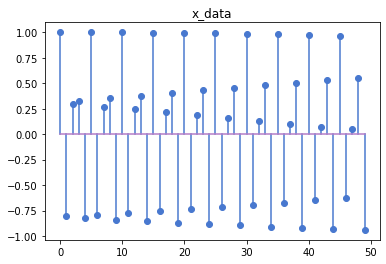

<ipython-input-173-05cbc6598492>:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(wave[0: end], label=legend)


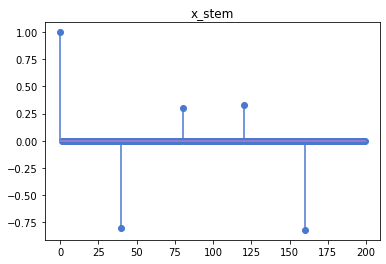

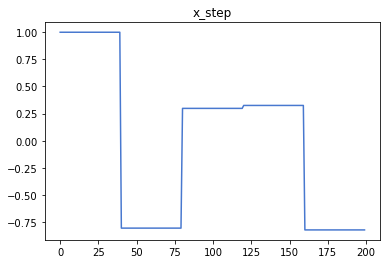

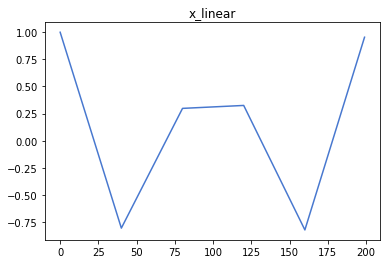

In [174]:
x_data, x_stem, x_step, x_linear = get_downsampled_x(y, ssrr, alpha)
# x_data is the data we have
plot_wave_start(x_data, 50, stem=True, title='x_data')
# x_stem shows the relationship between x_data and y
plot_wave_start(x_stem, 200, stem=True, title='x_stem')
IPython.display.display(IPython.display.Audio(data=x_stem, rate=sr))
# what if we use step-interpolation
plot_wave_start(x_step, 200, title='x_step')
IPython.display.display(IPython.display.Audio(data=x_step, rate=sr))
# what if we use linear-interpolation
plot_wave_start(x_linear, 200, title='x_linear')
IPython.display.display(IPython.display.Audio(data=x_linear, rate=sr))

In [175]:
# convolve x_stem with sinc
def get_sinc_signal(sr, truncation=0.5, beta=None, ssrr=None):
    if beta is None and ssrr is None:
        raise Exception('beat and ssrr cannot be both None')
    if beta is None:
        beta = ssrr
    x = np.arange(-truncation, truncation, 1 / sr)
    sinc_signal = np.sinc(beta * x)
    print('Sinc signal is created. beta=%.2f' % beta)
    return sinc_signal

Sinc signal is created. beta=1103.00


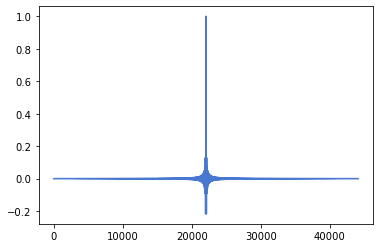

In [176]:
# Create a sinc wave
sinc_signal = get_sinc_signal(sr, 0.5, None, ssrr)
plot_wave_start(sinc_signal, None)

### Question 5: Convolve the signal `x_stem` with the sinc signal. Describe the reconstruction. 

In [177]:
##############################
x_recon = convolve(x_stem, sinc_signal, equal_size=True)
#x_recon = x_linear # This line should be erased.
##############################

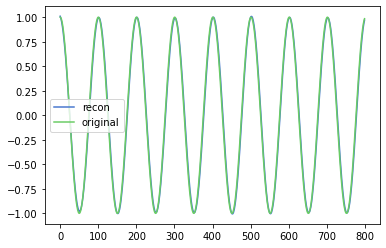

In [178]:
plot_wave_starts([x_recon, y], 800, [False, False], ['recon', 'original'])
IPython.display.display(IPython.display.Audio(data=x_recon, rate=sr))

### Question 6: Complete the function `convolve_fft`.

*Hint1:*
Recall the process has three steps:
1. FFT the signal `x_stem`
2. Multiply the signal in the frequency domain with a rectangular filter.
3. iFFT the signal back.


*Hint2:*
The width of the rectangular filter is [`-beta`, `beta`]


In [179]:
def convolve_fft(x_stem, sr, beta=None, ssrr=None, T=1.):
    if beta is None and ssrr is None:
        raise Exception('beat and ssrr cannot be both None')
    if beta is None:
        beta = T * ssrr / 2
    else:
        beta *= T
    # step one: fft
    x_fft = np.fft.fft(x_stem)
    # step two: multiply by a rectangle window
    # Do not worry about 
    ##############################
    # Your code
    # Do not worry about the height of the window. Set the height to 1.
    # Think about the bandwidth. How is that related to beta?
    sinc_signal1 = get_sinc_signal(44100, 0.5, None, ssrr)
    print(sinc_signal1.shape)
    # sinc_signal1 = np.concatenate([np.zeros(10), sinc_signal1, np.zeros(10)])
    # sinc_signal1 = sinc_signal1[0: 44100]
    sinc_signal1 = np.concatenate([sinc_signal1[22050:], sinc_signal1[0: 22050]])
    
    print(sinc_signal1.shape)
    print(len(x_fft))
    
    box = np.fft.fft(sinc_signal1) / 40
    print(len(box))
    plt.plot(np.abs(x_fft))
    plt.show()
    mid = int(len(x_fft) / 2)
    print(mid)
    x_fft[0: mid - 10] = x_fft[0: mid - 10] * box[0: mid - 10]
    x_fft[mid + 10: ] = x_fft[mid + 10: ] * box[mid - 10:]
    plt.plot(np.abs(x_fft))
    plt.show()
    print(x_fft.shape)
    plt.plot(box, '.')
    plt.xlim(0, 1000)
    plt.show()
    ##############################
    # step three: ifft
    x_recon = np.real(np.fft.ifft(x_fft))
    x_recon *= len(x_fft) / (2 * beta)
    return x_recon

Sinc signal is created. beta=1103.00
(44100,)
(44100,)
44120
44100


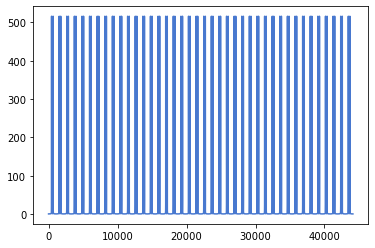

22060


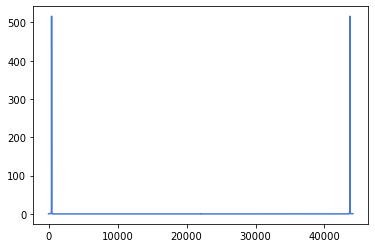

(44120,)


/Users/yutianqin/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


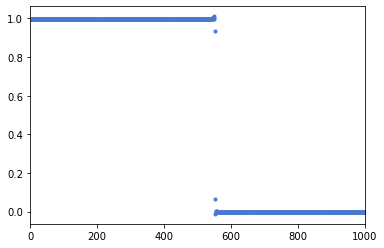

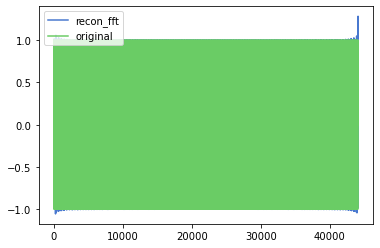

In [180]:
x_recon_fft = convolve_fft(x_stem, sr, None, ssrr)
plot_wave_starts([x_recon_fft, y], None, [False, False], ['recon_fft', 'original'])
IPython.display.display(IPython.display.Audio(data=x_recon_fft, rate=sr))

### Question 7: Compare the running time of the two methods: directly convolving with sinc and `convolve_fft`. What do you discover?

Directly convolving with sinc is much slower than `convolve_fft`. Directly convolving with a sinc is doing Fourier transform to a whole signal whose length is long without dividing the signal.

### Question 8 (Bonus): Could you reconstruct the data below?

In [181]:
# define constants
ssrr = 4411
sr = 44110
alpha = 10

# load data for you
x_data = np.load('lab3.npy')  # ssrr = 4411
x_stem = np.zeros((len(x_data), alpha))
x_stem[:, 0] = x_data
x_stem = x_stem.reshape(-1)

<ipython-input-173-05cbc6598492>:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(wave[0: end], label=legend)


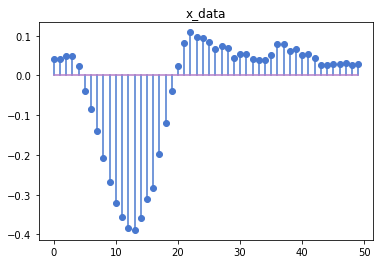

<ipython-input-173-05cbc6598492>:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(wave[0: end], label=legend)


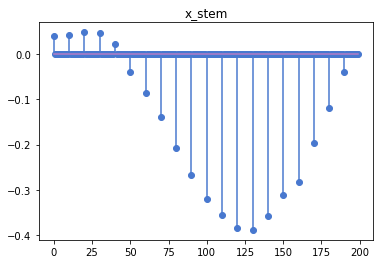

In [182]:
# display the data
# x_data is the data we have
plot_wave_start(x_data, 50, stem=True, title='x_data')
# x_stem shows the relationship between x_data and y
plot_wave_start(x_stem, 200, stem=True, title='x_stem')
IPython.display.display(IPython.display.Audio(data=x_stem, rate=sr))

<ipython-input-173-05cbc6598492>:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(wave[0: end], label=legend)


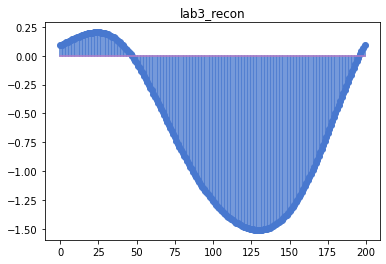

In [183]:
# your answer
lab3_recon = convolve(x_stem, sinc_signal, equal_size=True)
plot_wave_start(lab3_recon, 200, stem=True, title='lab3_recon')
IPython.display.display(IPython.display.Audio(data=lab3_recon, rate=sr))

### Question 9:  Can you reconstruct the signal well? Why?

No. It sounds that the frequency of the reconstructed signal is low as a whole. Maybe it is because the reconstruction is limited by ssrr. 